# Data analysis

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format ='{:,.3f}'.format
%config InlineBackend.figure_format = 'svg' 

Comparison of data from training and test samples.

In [3]:
train_data = pd.read_csv('data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [4]:
test_data = pd.read_csv('data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Missing data in the same parameters is observed in both the training and testing datasets. The data types match.

In [5]:
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,"5,943.000","7,500.000","7,500.000","7,500.000","7,500.000","7,500.000","3,419.000","7,486.000","7,500.000","7,500.000","7,500.000","5,943.000","7,500.000"
mean,"1,366,391.720",0.030,11.131,18.317,"945,153.727",0.170,34.693,0.117,"11,873,177.445","289,833.235","18,314.454","1,151.087",0.282
std,"845,339.200",0.272,4.909,7.042,"16,026,216.671",0.499,21.689,0.347,"31,926,122.975","317,871.382","11,926.765","1,604.451",0.450
min,"164,597.000",0.000,2.000,4.000,0.000,0.000,0.000,0.000,"11,242.000",0.000,0.000,585.000,0.000
25%,"844,341.000",0.000,8.000,13.500,"279,229.500",0.000,16.000,0.000,"180,169.000","114,256.500","10,067.500",711.000,0.000
50%,"1,168,386.000",0.000,10.000,17.000,"478,159.000",0.000,32.000,0.000,"309,573.000","209,323.000","16,076.500",731.000,0.000
75%,"1,640,137.000",0.000,14.000,21.800,"793,501.500",0.000,50.000,0.000,"519,882.000","360,406.250","23,818.000",743.000,1.000
max,"10,149,344.000",7.000,43.000,57.700,"1,304,726,170.000",7.000,118.000,4.000,"99,999,999.000","6,506,797.000","136,679.000","7,510.000",1.000


In [6]:
test_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,"1,987.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","1,142.000","2,497.000","2,500.000","2,500.000","2,500.000","1,987.000"
mean,"1,366,921.676",0.035,11.184,18.326,"710,570.406",0.162,34.181,0.107,"12,155,719.633","296,396.648","18,271.340","1,234.517"
std,"917,125.151",0.386,4.853,7.255,"1,511,983.484",0.560,22.024,0.357,"32,260,973.720","378,301.966","11,543.881","1,740.219"
min,"106,533.000",0.000,1.000,3.900,0.000,0.000,0.000,0.000,"15,422.000",0.000,93.000,585.000
25%,"852,311.500",0.000,8.000,13.400,"278,586.000",0.000,16.000,0.000,"187,126.500","110,114.500","10,024.750",710.000
50%,"1,178,475.000",0.000,10.000,17.000,"478,676.000",0.000,30.000,0.000,"322,366.000","207,385.000","16,642.500",731.000
75%,"1,629,734.500",0.000,14.000,22.100,"802,598.500",0.000,50.000,0.000,"522,582.500","366,348.500","24,146.000",743.000
max,"14,975,610.000",15.000,48.000,53.400,"54,484,386.000",15.000,82.000,5.000,"99,999,999.000","6,030,087.000","93,555.000","7,480.000"


In [7]:
train_data.describe(include=['object', 'bool'])

,Home Ownership,Years in current job,Purpose,Term
count,7500,7129,7500,7500
unique,4,11,15,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,3637,2332,5944,5556


In [8]:
test_data.describe(include=['object', 'bool'])

,Home Ownership,Years in current job,Purpose,Term
count,2500,2414,2500,2500
unique,4,11,14,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,1225,810,1973,1861


The distribution parameters are not significantly different. Only the 'Maximum Open Credit' parameter in the training data has values orders of magnitude higher.

<AxesSubplot:>

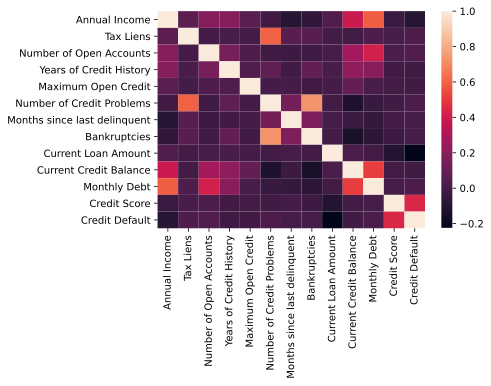

In [9]:
sns.heatmap(train_data.corr())

<AxesSubplot:>

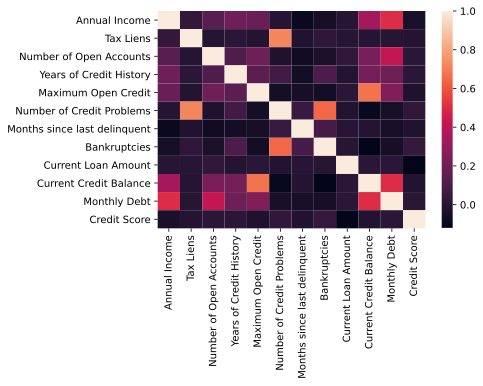

In [10]:
sns.heatmap(test_data.corr())

The correlation map is roughly the same. In the training data, 'Current Credit Balance' and 'Maximum Open Credit' are strongly correlated, but this could simply be a quirk of the sample.

Since the characteristics of the samples are roughly the same, we will primarily use the training data in further analysis.

## Home Ownership

Categorical data.

In [11]:
train_data['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [12]:
pd.crosstab(train_data['Home Ownership'], train_data['Credit Default'], normalize=False)

Credit Default,0,1
Home Ownership,,
Have Mortgage,10,2
Home Mortgage,2721,916
Own Home,455,192
Rent,2201,1003


These data can be encoded quite easily.

In [13]:
train_data_prepared = pd.get_dummies(train_data['Home Ownership'], prefix='ho', columns = ['Home Ownership'], drop_first=False)
train_data_prepared

,ho_Have Mortgage,ho_Home Mortgage,ho_Own Home,ho_Rent
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
7495,0,0,0,1
7496,0,1,0,0
7497,0,0,0,1
7498,0,1,0,0


## Annual Income

Annual Income does not correlate with other parameters.

In [9]:
train_data['Annual Income'].describe()

count        5,943.000
mean     1,366,391.720
std        845,339.200
min        164,597.000
25%        844,341.000
50%      1,168,386.000
75%      1,640,137.000
max     10,149,344.000
Name: Annual Income, dtype: float64

<AxesSubplot:>

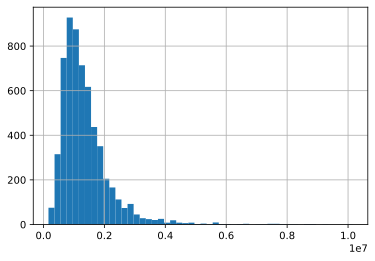

In [14]:
train_data['Annual Income'].hist(bins=50)

The distribution appears to be logarithmic. To normalize it, we can apply the Box-Cox transformation. Missing data can be replaced with the mean, median, or a very large number (for tree-based algorithms).

## Years in current job

<AxesSubplot:xlabel='Years in current job'>

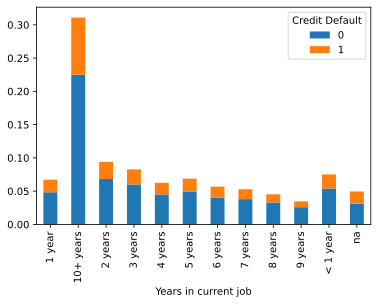

In [48]:
pd.crosstab(train_data['Years in current job'].fillna('na'), train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Missing data could indicate any term or absence of employment. It can be replaced with zero values or a very large value.

Let's replace the string values with their corresponding numerical ones. The value '< 1 year' can be replaced with either 0 or 0.5.

## Tax Liens

It has weak correlation with Number of Credit Problems.

In [31]:
train_data['Tax Liens'].describe()

count   7,500.000
mean        0.030
std         0.272
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Tax Liens, dtype: float64

<AxesSubplot:xlabel='Tax Liens'>

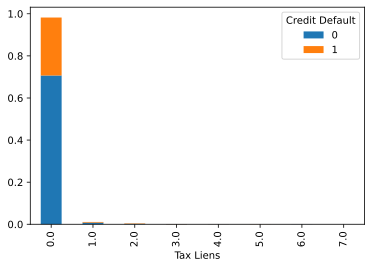

In [15]:
pd.crosstab(train_data['Tax Liens'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

We can binarize the data by replacing values greater than 0 with 1.

## Number of Open Accounts

In [60]:
train_data['Number of Open Accounts'].describe()

count   7,500.000
mean       11.131
std         4.909
min         2.000
25%         8.000
50%        10.000
75%        14.000
max        43.000
Name: Number of Open Accounts, dtype: float64

<AxesSubplot:xlabel='Number of Open Accounts'>

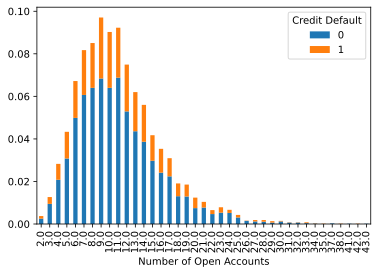

In [16]:
pd.crosstab(train_data['Number of Open Accounts'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

We can normalize using either the Box-Cox or the Yeo-Johnson transformation.

## Years of Credit History

In [64]:
train_data['Years of Credit History'].describe()

count   7,500.000
mean       18.317
std         7.042
min         4.000
25%        13.500
50%        17.000
75%        21.800
max        57.700
Name: Years of Credit History, dtype: float64

<AxesSubplot:>

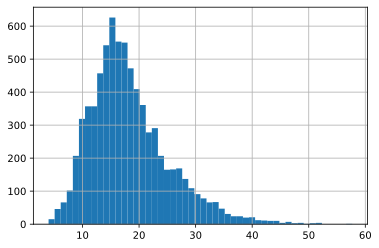

In [17]:
train_data['Years of Credit History'].hist(bins=50)

We can normalize using either the Box-Cox or the Yeo-Johnson transformation.

## Maximum Open Credit

In [68]:
train_data['Maximum Open Credit'].describe()

count           7,500.000
mean          945,153.727
std        16,026,216.671
min                 0.000
25%           279,229.500
50%           478,159.000
75%           793,501.500
max     1,304,726,170.000
Name: Maximum Open Credit, dtype: float64

<AxesSubplot:>

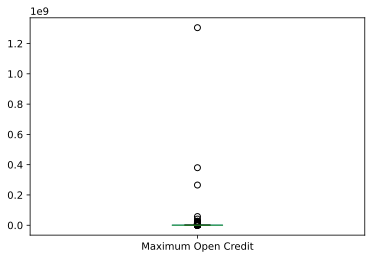

In [18]:
train_data['Maximum Open Credit'].plot(kind='box')

To tackle the massive outlier, we can replace values exceeding a certain threshold with the threshold value.

For normalization, we can use either quantile transformation or Yeo-Johnson.

## Number of Credit Problems

In [78]:
train_data['Number of Credit Problems'].describe()

count   7,500.000
mean        0.170
std         0.499
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Number of Credit Problems, dtype: float64

<AxesSubplot:xlabel='Number of Credit Problems'>

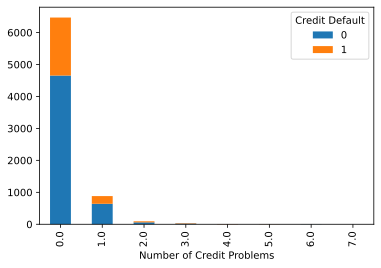

In [19]:
pd.crosstab(train_data['Number of Credit Problems'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

It correlates with Bankruptcies and shows weak correlation with Tax Liens.

The data can be binarized by replacing values greater than 0 with 1.

## Months since last delinquent

In [77]:
train_data['Months since last delinquent'].describe()

count   3,419.000
mean       34.693
std        21.689
min         0.000
25%        16.000
50%        32.000
75%        50.000
max       118.000
Name: Months since last delinquent, dtype: float64

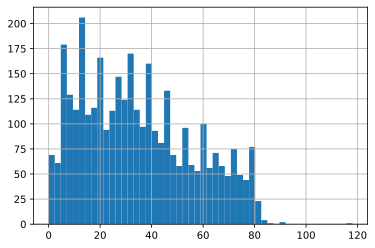

In [20]:
fig = train_data['Months since last delinquent'].hist(bins=50).get_figure()

A large number of values are missing. We can consider dropping this parameter or try replacing missing data with a large number, especially for tree-based models.

## Bankruptcies

In [88]:
train_data['Bankruptcies'].value_counts()

0.000    6660
1.000     786
2.000      31
3.000       7
4.000       2
Name: Bankruptcies, dtype: int64

<AxesSubplot:xlabel='Bankruptcies'>

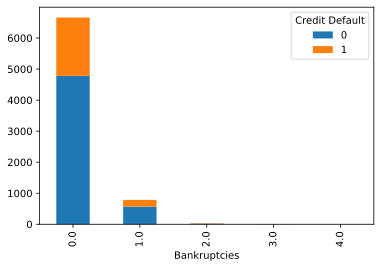

In [21]:
pd.crosstab(train_data['Bankruptcies'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

It may be necessary to convert it into a binary format (yes or no).

It correlates well with the Number of Credit Problems. We can fill in the missing values based on the data from this parameter.

The data can be binarized by replacing values greater than 0 with 1.

## Purpose

<AxesSubplot:xlabel='Purpose'>

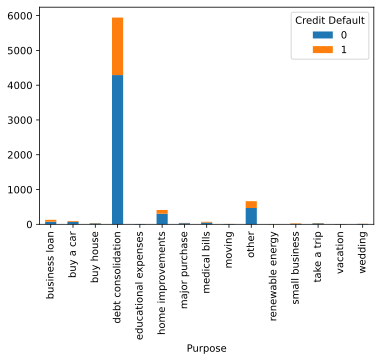

In [22]:
pd.crosstab(train_data['Purpose'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

These data can be encoded quite easily.

## Term

In [101]:
train_data['Term'].describe()

count           7500
unique             2
top       Short Term
freq            5556
Name: Term, dtype: object

<AxesSubplot:xlabel='Term'>

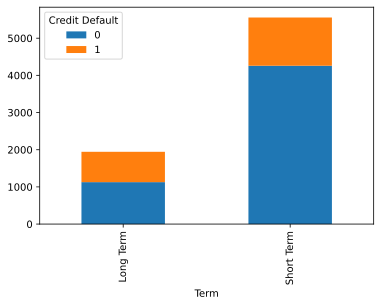

In [23]:
pd.crosstab(train_data['Term'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

Let's replace the string values with numerical ones. 'Long Term' will be replaced with 0, and 'Short Term' with 1.

## Current Loan Amount

In [104]:
train_data['Current Loan Amount'].describe()

count        7,500.000
mean    11,873,177.445
std     31,926,122.975
min         11,242.000
25%        180,169.000
50%        309,573.000
75%        519,882.000
max     99,999,999.000
Name: Current Loan Amount, dtype: float64

<AxesSubplot:>

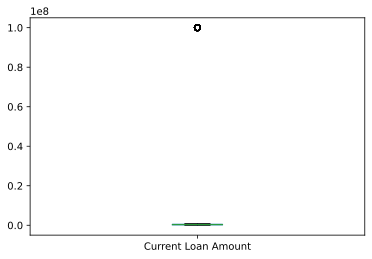

In [24]:
train_data['Current Loan Amount'].plot(kind='box')

Most likely, the value 99999999 is erroneous. Let's mark it as missing. Alternatively, we can leave it as is, especially for tree-based models.

For normalization, we can use quantile transformation or Yeo-Johnson.

# Current Credit Balance

In [60]:
train_data['Current Credit Balance'].describe()

count       7,500.000
mean      289,833.235
std       317,871.382
min             0.000
25%       114,256.500
50%       209,323.000
75%       360,406.250
max     6,506,797.000
Name: Current Credit Balance, dtype: float64

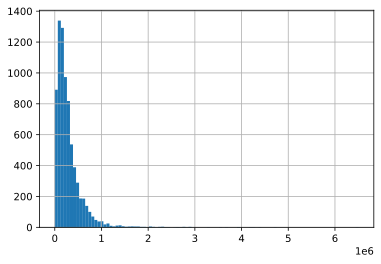

In [25]:
fig = train_data['Current Credit Balance'].hist(bins=100).get_figure()

For normalization, we can use quantile transformation or Yeo-Johnson.

# Monthly Debt

In [26]:
train_data['Monthly Debt'].describe()

count     7,500.000
mean     18,314.454
std      11,926.765
min           0.000
25%      10,067.500
50%      16,076.500
75%      23,818.000
max     136,679.000
Name: Monthly Debt, dtype: float64

<AxesSubplot:>

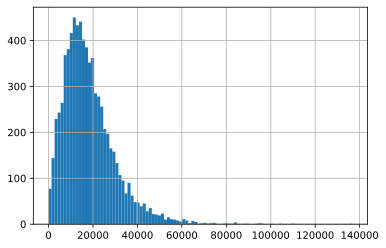

In [27]:
train_data['Monthly Debt'].hist(bins=100)

For normalization, we can use quantile transformation or Yeo-Johnson.

# Credit Score

In [28]:
train_data['Credit Score'].describe()

count   5,943.000
mean    1,151.087
std     1,604.451
min       585.000
25%       711.000
50%       731.000
75%       743.000
max     7,510.000
Name: Credit Score, dtype: float64

<AxesSubplot:>

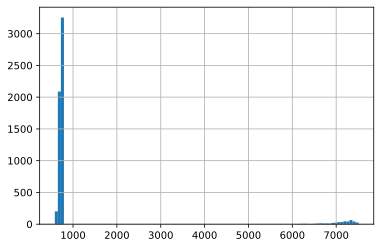

In [32]:
train_data['Credit Score'].hist(bins=100)

<AxesSubplot:>

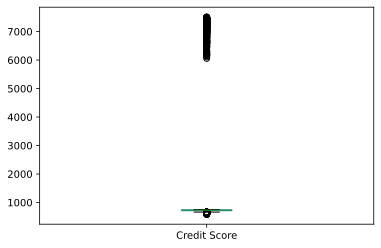

In [33]:
train_data['Credit Score'].plot(kind='box')

The data suggests that excessively large values likely have an extra zero. Since these values are multiples of 10 and there are two value ranges from 550 to 760 and from 5500 to 7600, let's divide the anomalous values by 10.

For normalization, we can use quantile transformation or Yeo-Johnson.